In [ ]:
from notebooks import *

In [ ]:
load = Load()
all_recs = load.recs(
    # limit=30,  # XXX Faster dev
    datasets=[
        'peterson-field-guide',
        # 'recordings',
    ],
)
display(
    df_summary(all_recs),
    all_recs[:5],
)

,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,filesize_b
dtype,object,category,category,object,float64,float64,int64,object,category,object,object,int64
sizeof,44.4 KiB,6.8 KiB,7.2 KiB,37.2 KiB,8.4 KiB,8.4 KiB,8.4 KiB,46.2 KiB,7.4 KiB,64.0 KiB,66.1 KiB,8.4 KiB
len,535,535,535,535,535,535,535,535,535,535,535,535
count,535,535,535,535,535,535,535,535,535,535,535,535
nunique,1,35,35,35,440,440,440,535,35,535,535,440
mean,NaN,NaN,NaN,NaN,20.552,0.864,453176.344,NaN,NaN,NaN,NaN,657670.462
std,NaN,NaN,NaN,NaN,8.785,0.369,193707.421,NaN,NaN,NaN,NaN,281117.334
min,peterson-field-guide,SCQU,Scaled Quail,amecro,2.74,0.115,60480,43186571 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/amecro/audio/43215281 Caw (clear),peterson-field-guide/amecro/audio/43215281 Caw (clear).mp3,87771
25%,peterson-field-guide,BOCH,Boreal Chickadee,bushti,14.70,0.617,323712,43217471 Chick-a-dee Call (mostly Dee notes),Boreal Chickadee - BOCH,peterson-field-guide/bushti/audio/43218221 Dzit Series & Dzit,peterson-field-guide/bushti/audio/43218221 Dzit Series & Dzit.mp3,469786
50%,peterson-field-guide,CANW,Canyon Wren,herthr,19.90,0.837,438912,43219321 Female & Male Song duet,Canyon Wren - CANW,peterson-field-guide/herthr/audio/43222801 Seer,peterson-field-guide/herthr/audio/43222801 Seer.mp3,636969


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,filesize_b
387,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.1,0.509,266688,43186661 Chip-seer,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186661 Chip-seer,peterson-field-guide/scaqua/audio/43186661 Chip-seer.mp3,387030
379,peterson-field-guide,SCQU,Scaled Quail,scaqua,32.2,1.350,710208,43186571 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186571 Song (Screech),peterson-field-guide/scaqua/audio/43186571 Song (Screech).mp3,1030687
380,peterson-field-guide,SCQU,Scaled Quail,scaqua,20.8,0.877,459648,43186581 Song (Screech),Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186581 Song (Screech),peterson-field-guide/scaqua/audio/43186581 Song (Screech).mp3,667062
381,peterson-field-guide,SCQU,Scaled Quail,scaqua,12.3,0.517,271296,43186591 Kuk-curr Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series,peterson-field-guide/scaqua/audio/43186591 Kuk-curr Series.mp3,393717
382,peterson-field-guide,SCQU,Scaled Quail,scaqua,19.7,0.831,435456,43186601 Kuk-curr Series,Scaled Quail - SCQU,peterson-field-guide/scaqua/audio/43186601 Kuk-curr Series,peterson-field-guide/scaqua/audio/43186601 Kuk-curr Series.mp3,631954


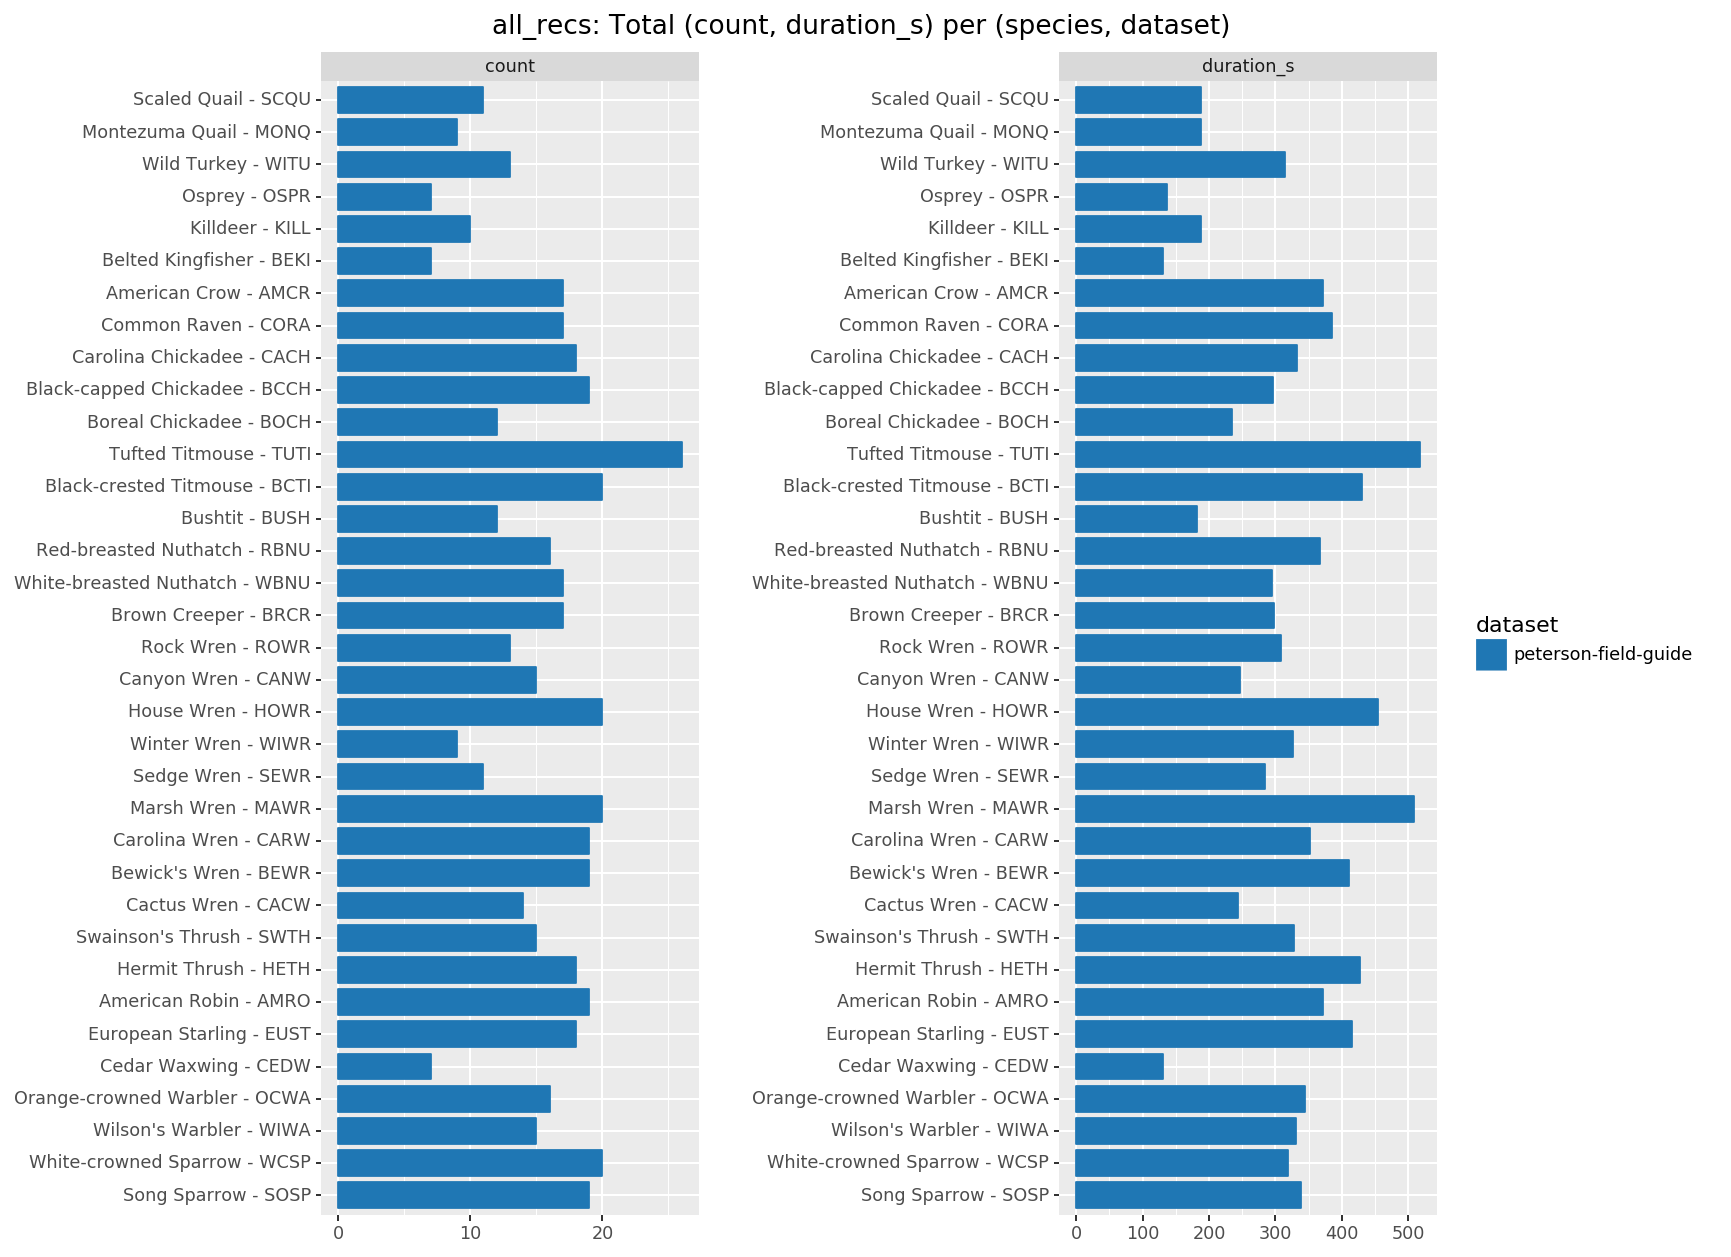

<ggplot: (-9223372036537888042)>

In [ ]:
(all_recs
    .assign(species=lambda df: df.species_longhand)
    .assign(count=1)
    # 0-fill all (species, dataset) combinations to create empty placeholders for missing bars
    .pipe(lambda df: df.append(
        pd.DataFrame([
            dict(species=species, dataset=dataset, duration_s=0)
            for species in df.species.unique()
            for dataset in df.dataset.unique()
        ])
        .astype({'species': df.species.dtype})
    ))
    .groupby(['dataset', 'species'])[['count', 'duration_s']].sum().reset_index()
    .pipe(pd.melt, id_vars=['dataset', 'species'], value_vars=['count', 'duration_s'])
    .pipe(df_reverse_cat, 'species')
    .pipe(ggplot, aes(x='species', y='value', fill='dataset', color='dataset'))
    + coord_flip()
    + geom_bar(stat='identity', position=position_dodge(), width=.8)
    + facet_wrap('variable', nrow=1, scales='free')
    + xlab('')
    + ylab('')
    + scale_fill_cmap_d(mpl.cm.tab10)
    + scale_color_cmap_d(mpl.cm.tab10)
    + theme(panel_spacing=2.5)
    + theme_figsize(width=10, aspect_ratio=3/1)
    + ggtitle(f'all_recs: Total (count, duration_s) per (species, dataset)')
)

# Fit search

In [ ]:
# Load models
projection = Projection.load('peterson-v0-26bae1c')
features = projection.features
load = features.load

[23:32:27.862] Projection.load
  path: /Users/danb/hack/bubo/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
%%prun -l5
# Add features
recs = projection.transform(all_recs
    # .sample(random_state=0, frac=.1)  # ~50
)

[##########################################################################################] | 100% Completed |  1.0s

         149156 function calls (143756 primitive calls) in 1.323 seconds

   Ordered by: internal time
   List reduced from 1075 to 5 due to restriction <5>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      889    0.902    0.001    0.902    0.001 {method 'acquire' of '_thread.lock' objects}
        4    0.103    0.026    0.243    0.061 base.py:609(tokenize)
        4    0.048    0.012    0.048    0.012 {built-in method _hashlib.openssl_md5}
      164    0.045    0.000    0.045    0.000 socket.py:333(send)
      360    0.035    0.000    0.035    0.000 {method 'replace' of 'str' objects}

In [ ]:
df_summary(recs).T

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
dataset,object,88.3 KiB,535,535,1.0,NaN,NaN,peterson-field-guide,peterson-field-guide,peterson-field-guide,peterson-field-guide,peterson-field-guide
species,category,8.1 KiB,535,535,35.0,NaN,NaN,SCQU,BOCH,CANW,SWTH,SOSP
species_com_name,category,8.4 KiB,535,535,35.0,NaN,NaN,Scaled Quail,Boreal Chickadee,Canyon Wren,Swainson's Thrush,Song Sparrow
species_query,object,37.3 KiB,535,535,35.0,NaN,NaN,amecro,bushti,herthr,sedwre,wlswar
duration_s,float64,8.4 KiB,535,535,440.0,20.552,8.785,2.74,14.7,19.9,24.7,63.9
samples_mb,float64,8.4 KiB,535,535,440.0,0.864,0.369,0.115,0.617,0.837,1.04,2.69
samples_n,int64,8.4 KiB,535,535,440.0,453176.344,193707.421,60480,323712,438912,544320,1408896
basename,object,46.8 KiB,535,535,535.0,NaN,NaN,43186571 Song (Screech),43217471 Chick-a-dee Call (mostly Dee notes),43219321 Female & Male Song duet,43222661 Song,44412351 Seet & Chip (begging juveniles)
species_longhand,category,8.6 KiB,535,535,35.0,NaN,NaN,Scaled Quail - SCQU,Boreal Chickadee - BOCH,Canyon Wren - CANW,Swainson's Thrush - SWTH,Song Sparrow - SOSP


In [ ]:
recs_eval = (recs
    [lambda df: df.dataset == 'peterson-field-guide']
    # [:10]  # Faster dev
    .reset_index(drop=True)
)
train_n, test_n = (len(recs_eval)+1)//2, len(recs_eval)//2
recs_train, recs_test = (recs_eval
    .pipe(sklearn.utils.shuffle, random_state=0)
    .sample(train_n + test_n, random_state=0)
    .pipe(lambda df: (
        df[:train_n],
        df[train_n : train_n + test_n],
    ))
)
log('params', **{
    'recs_eval': len(recs_eval),
    'recs_train': len(recs_train),
    'recs_test': len(recs_test),
})

[23:32:29.473] params
  recs_eval: 535
  recs_train: 268
  recs_test: 267


In [ ]:
%%time
from sp14.model import *
search = Search(
    projection=projection,
    # n_neighbors=3,
    n_neighbors=5,
    # n_neighbors=10,
)
search.fit(recs_train)

[23:32:29.514] Search.fit:in
  recs: 268
  (n, f*p): [268, 1500]
[Memory]7.8s, 0.1min    : Loading _fit from /Users/danb/hack/bubo/data/cache/joblib/sp14/model/_fit/3c17329cd8875cf999a25b2976c76861
_________________________________________________fit cache loaded - 0.0s, 0.0min


[23:32:29.951] Search.fit:out
  knn.get_params: {algorithm: auto, leaf_size: 30, metric: minkowski, metric_params: null, n_jobs: 1, n_neighbors: 5, p: 2, weights: uniform}
  knn.classes_: [SCQU, MONQ, WITU, OSPR, KILL, BEKI, AMCR, CORA, CACH, BCCH, BOCH, TUTI, BCTI, BUSH, RBNU, WBNU, BRCR, CACW, ROWR, CANW, CARW, BEWR, HOWR, WIWR, SEWR, MAWR, SWTH, HETH, AMRO, EUST, CEDW, OCWA, WIWA, SOSP, WCSP]
  knn.classes_.len: 35
CPU times: user 394 ms, sys: 41 ms, total: 435 ms
Wall time: 443 ms


# Eval search

In [ ]:
search.coverage_error(recs_test)

18.797752808988765

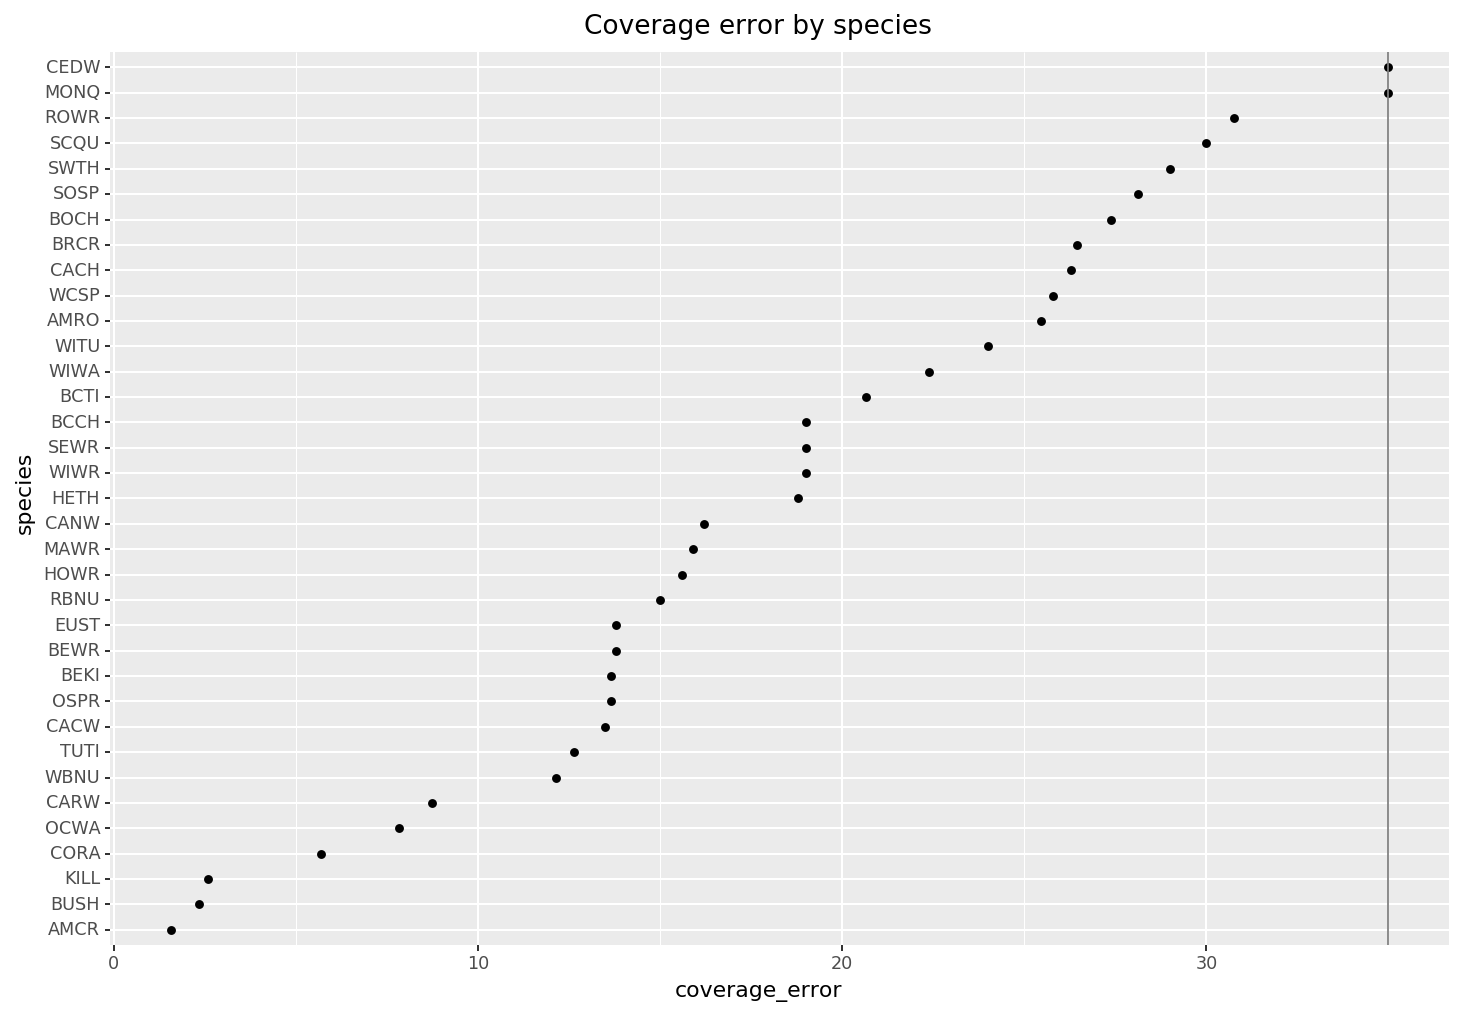

<ggplot: (326510961)>

In [ ]:
(search.coverage_error_by(recs_test, 'species')
    # FIXME Update for new df_transform_cats api
    .pipe(lambda df: df_transform_cats(df, ['species'], f=lambda _: df.sort_values('coverage_error').species))
    .pipe(ggplot, aes(x='species', y='coverage_error'))
    + geom_point()
    + coord_flip()
    + geom_hline(yintercept=len(search.classes_), color='grey')
    + theme_figsize('inline')
    + ggtitle('Coverage error by species')
)

[23:32:32.263] Search.species
  recs: 267
  (n, k*a): [267, 1500]
  species: 267
[23:32:32.268] Search.confusion_matrix
  M: [35, 35]


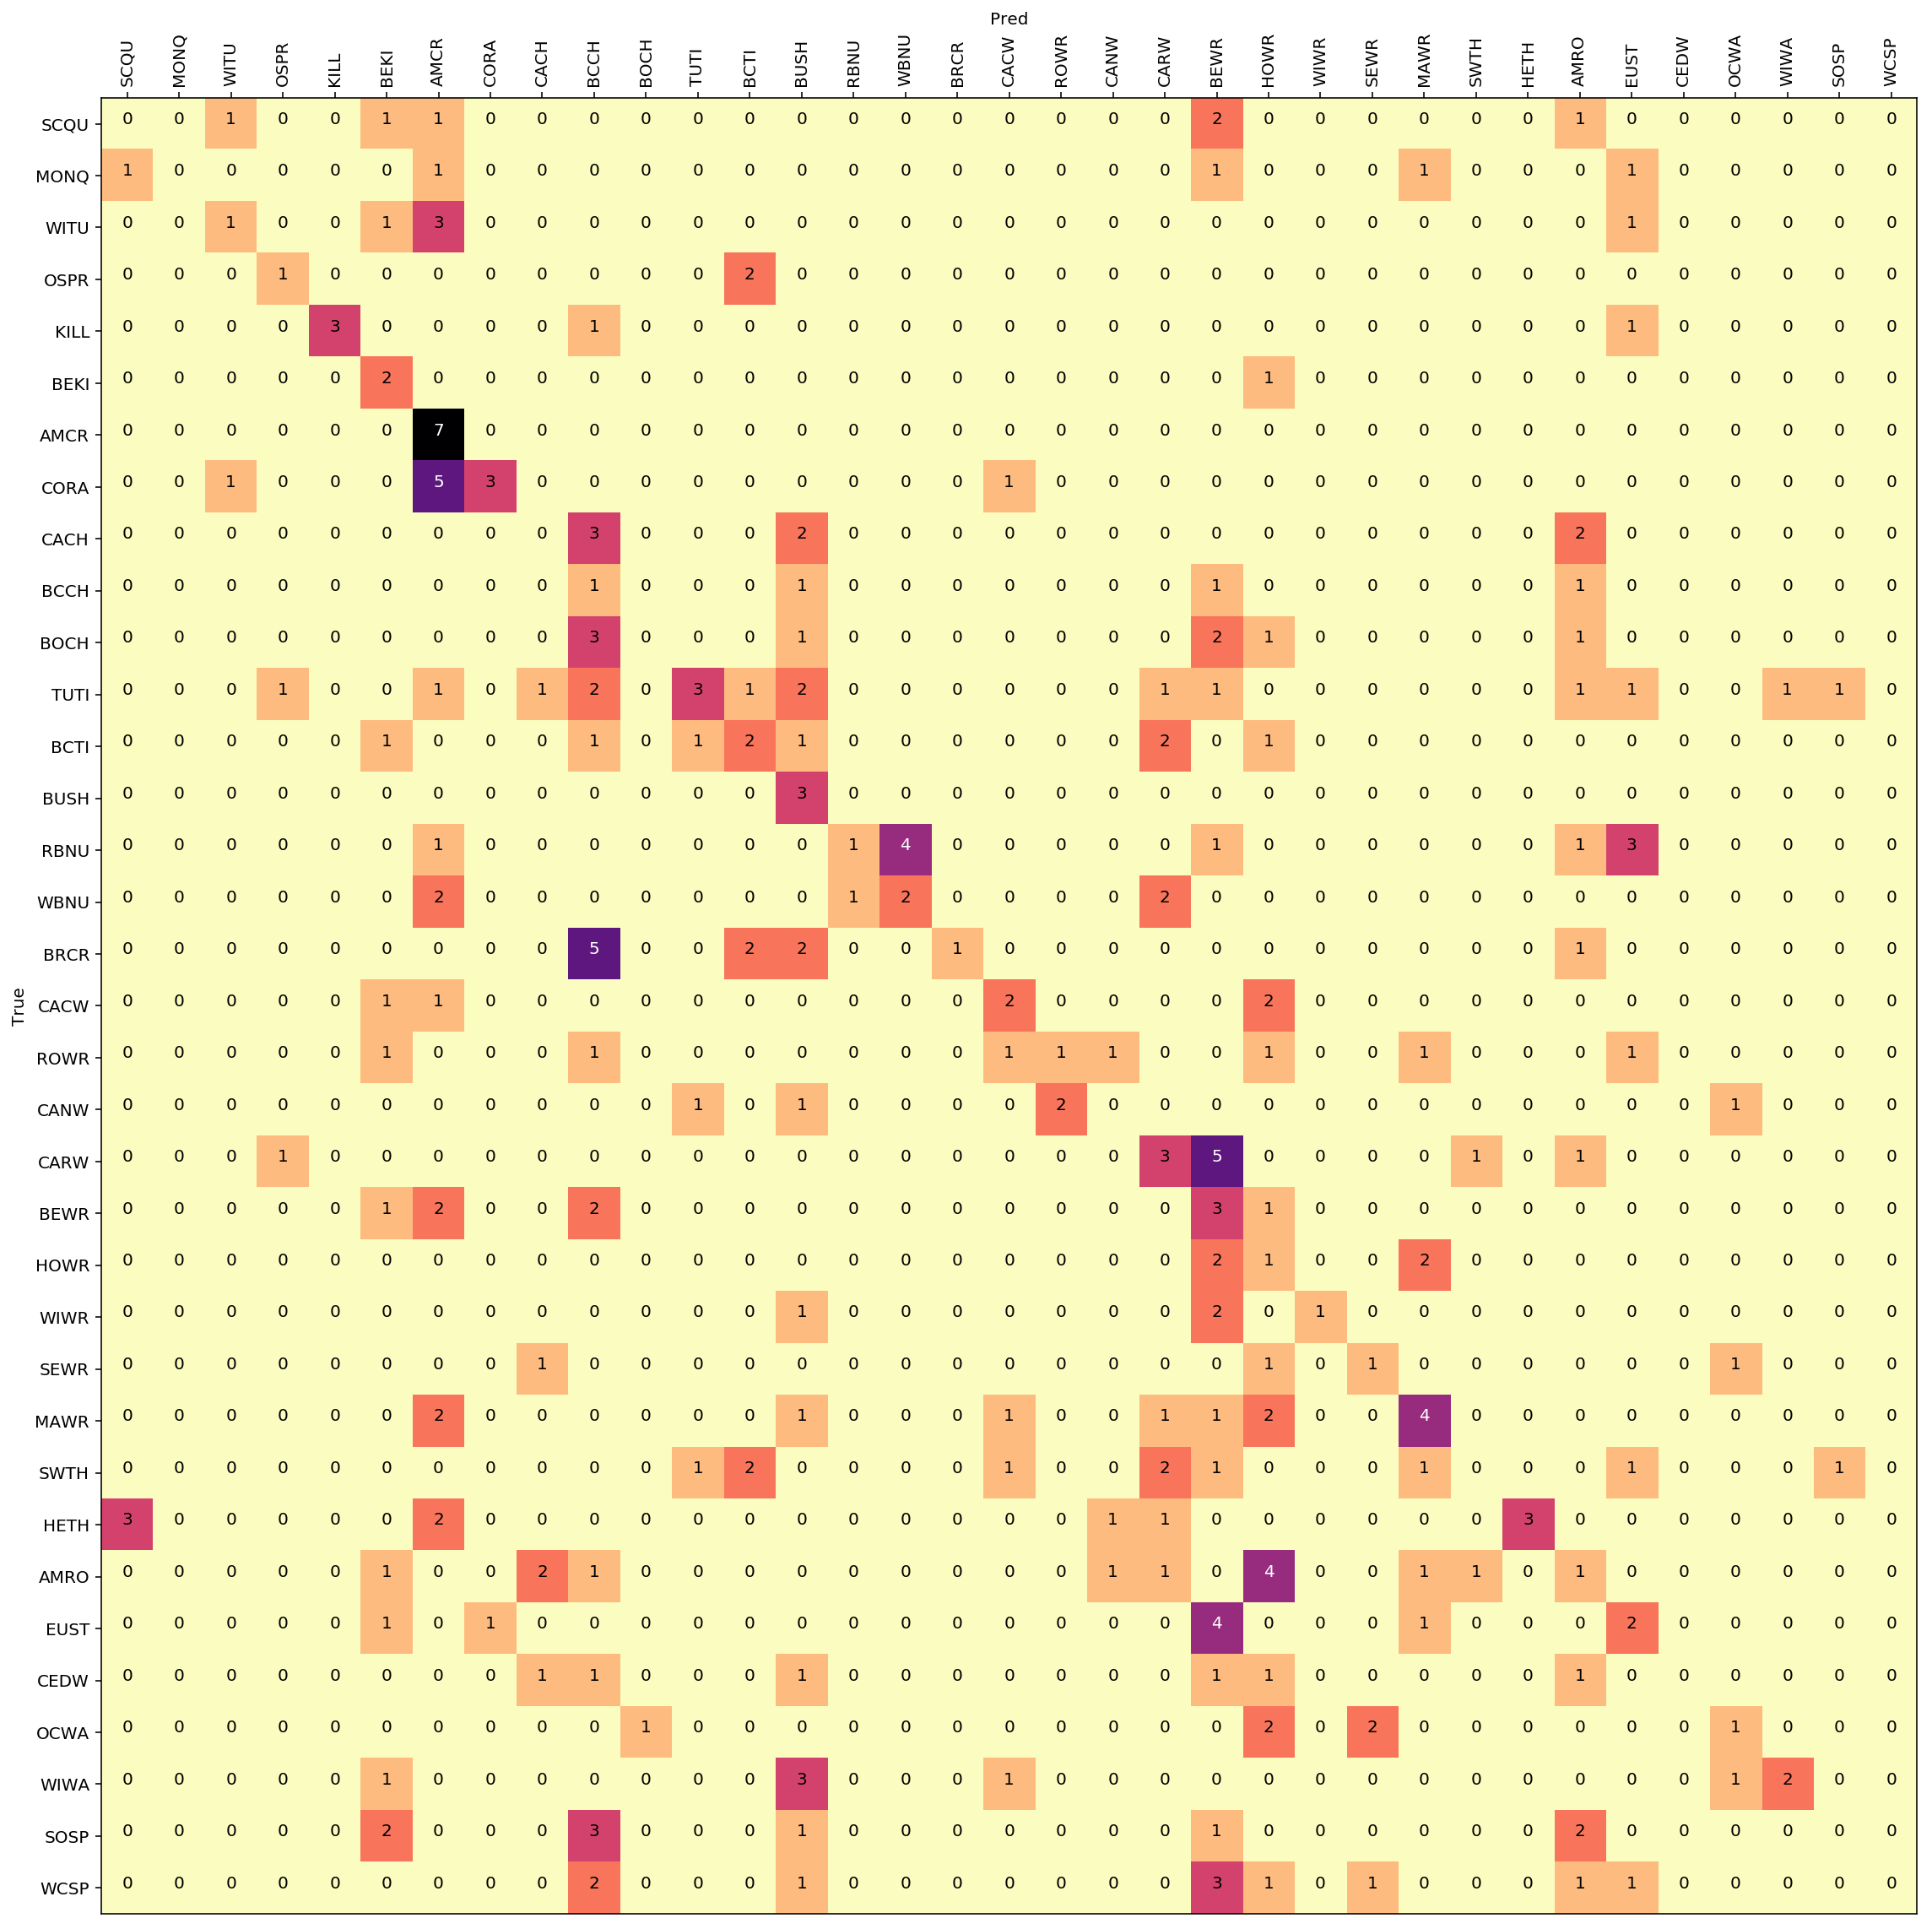

CPU times: user 5.58 s, sys: 545 ms, total: 6.13 s
Wall time: 5.54 s


In [ ]:
%%time
with figsize('full'):
    search.plot_confusion_matrix(recs_test)

In [ ]:
# Example usage
# search.species(recs_test[:5])
# search.species_probs(recs_test[:5]).T[:search.knn_.n_neighbors + 1].T
# search.similar_recs(recs_test[:5], 10)